# **Códigos e Implementações**

Antes de apresentar as respostas para as questões, expõe-se os códigos que são utilizados para a resolução das mesmas.

Cada código de implementação é identificado por um algarismo romano, de forma que, para fazer referência ao mesmo, indica-se, por exemplo implementação $\textbf{I}$, $\textbf{II}$ ou $\textbf{III}$, dentre outras.

In [1]:
################################################################################

                        #Bibliotecas Utilizadas

################################################################################

import numpy as np
from scipy import linalg as lin
import scipy as sci
import math as m
import matplotlib.pyplot as plt
from sympy import *

################################################################################

                        #Implementações MMQ

################################################################################

      ##########################################
# I)  ############# MMQ Discreto ###############
      ##########################################

def mmq(x,y,k):
    X = np.vander(x,k);         #Matriz Vandermont, fornece os vetores base dos polinômios
    A = np.transpose(X).dot(X); #XtX --> dá matriz que define o sistema linear de melhor aproximação
    b = np.transpose(X).dot(y); #Xty  --> dá matriz independente que define o sistema linear
    a = np.linalg.solve(A,b);   #Resolução do sistema linear

    return a;

      ##########################################
# II) ########### Erro MMQ Discreto ############
      ##########################################

def errod(xm,ym,p):                                                             #Calculo do erro com base nos vetores de dados
    Q = 0                                                                       
    n = np.shape(xm)[1]                                                         #Dá o número de iterações com base no vetor xm
    for i in range(0,n,1):                                                    
      q = (p(xm[0][i]) - ym[0][i])**2                                           #Calculo do erro de truncamento
      Q = Q + q                                                                 #Somatório
    print(Q)

################################################################################

                    #Implementações Integração Numérica

################################################################################

        ##########################################
# III)  ########### Regra do Trapezio ############
        ##########################################

def trapezio(xi,yi):
    N = len(xi)-1;                                                              #Número de subintervalos
    h = xi[1]-xi[0];                                                            #Passo 

## Calculo da integral!
    integral = (h/2)*(yi[0]+yi[N]) + h*np.sum(yi[1:N]);                         #Termo geral

    return integral;

       ##############################################
# IV)  ########### Regra do 1/3 de Simpson ##########
       ##############################################

def simpson13(xi,yi):
    N = len(xi)-1;                                                              #Número de subintervalos
    h = xi[1]-xi[0];                                                            #Passo 

### Calculo da integral
    integral = 4*np.sum(yi[1:N:2]) + 2*np.sum(yi[2:N-1:2]);
    integral = (h/3)*(yi[0] + integral + yi[N]);                                #Termo geral do método

    return integral;

        ##############################################
# V)    ############ Regra do 3/8 de Simpson #########
        ##############################################

def simpson38(xi,yi):
    N = len(xi)-1;                                                              #Número de subintervalos
    h = xi[1]-xi[0];                                                            #Passo 

## Calculo da integral!
    integral = 3*np.sum(yi[1:N-1:3]) + 3*np.sum(yi[2:N:3]) + 2*np.sum(yi[3:N-2:3]);
    integral = (3.0*h/8.0)*(yi[0] + integral + yi[N]);                          #Termo geral do método

    return integral;

################################################################################

                    #Implementações Sistemas de EDOs

################################################################################

          ####################################################
# VI)     ## Método de Range Kutta de 4 Ordem para sistemas ##
          ####################################################

def rk4_sys(x,h,F,Y0):
    n = len(x);                                                                 #Identifica o número de pontos do intervalo (iterações a serem feitas)
    m = len(Y0);                                                                #Número de condições iniciais e funções incógnitas
    Y = np.zeros((m,n));                                                        #Tabela de valores (resultado)
    Y[:,0] = Y0;                                                                #Valores das funções para iteração zero

    for i in np.arange(1,n):                                                    #Termo geral da método
        k1 = F(x[i-1],Y[:,i-1]);
        k2 = F(x[i-1]+0.5*h,Y[:,i-1]+0.5*h*k1);
        k3 = F(x[i-1]+0.5*h,Y[:,i-1]+0.5*h*k2);
        k4 = F(x[i-1]+h,Y[:,i-1]+h*k3);

        Y[:,i] = Y[:,i-1] + (h/6)*(k1+2*(k2+k3)+k4);

    return Y;


# **Questão 1**

O problema baseia-se na resolução de um problema de Mínimos Quadrados, onde obtém-se as funções dentre cada família de funções polinomiais (primeiro, segundo, terceiro e quarto grau) as quais melhor se aproximam dos pontos fornecidos pelo enunciado.

A fim de decidir qual dentre as curvas obtidas que melhor se aproxima dos pontos, emprega-se o erro de truncamento para o caso discreto, que é dado pela seguinte equação.

\begin{equation}
Q = ||f - P_{n}||^2 = \sum_{k = 0}^{n}(y_{k} - P_{n}(x_{k}))^{2}
\end{equation}

Como contido no material visto em aula.

Para a resolução do problema, é utilizado o algoritmo ($\textbf{I}$) que por meio da base de vetores para o espaço vetorial das funções polinômiais de ordem $n$, obtém a melhor aproximação para cada um dos graus dentre $n = \{1,2,3,4\}$.
A fim de implementá-lo, tem-se como grandezas de entrada duas listas ($x$, $y$) que contém os dados do problema. Por sua vez, a terceira entrada, o parâmetro $k$, definirá o grau dos polinômios ($n = k - 1$). Desse modo, implementa-se o código 4 vezes, de forma que para cada aplicação, tem-se como saída uma matriz de $n$ elementos, sendo esses coeficientes dos polinômios de melhor aproximação. Em seguida, emprega-se os elementos da matriz para a construção dos polinômios e, posteriormente, sua representação gráfica.

O algoritmo ($\textbf{II}$) é empregado após a resolução do problema de MMQ, onde usando o polinômio resultado, calcula-se $P_{n}(x_{k})$ de forma a compará-los com os dados do enunciado. A curva que melhor se aproxima dos pontos será a que apresentar menor erro de truncamento.


Erro de truncamento de P4(x)
643.5576955196066


Erro de truncamento de P3(x)
746.9883340726102


Erro de truncamento de P2(x)
904.2244502351775


Erro de truncamento de P1(x)
3033.996399289855


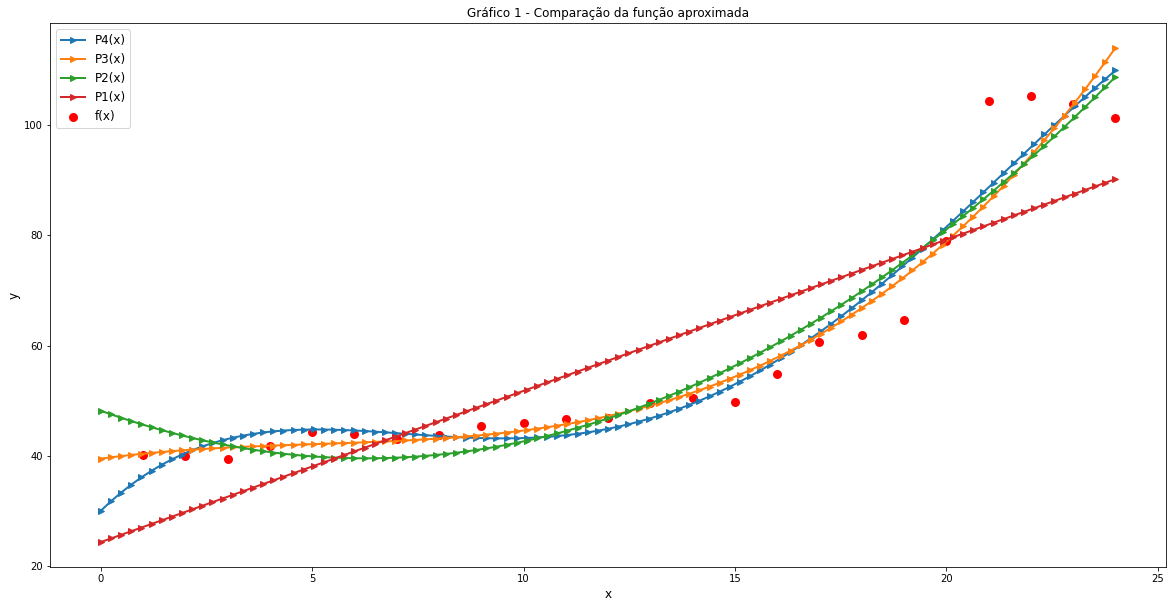

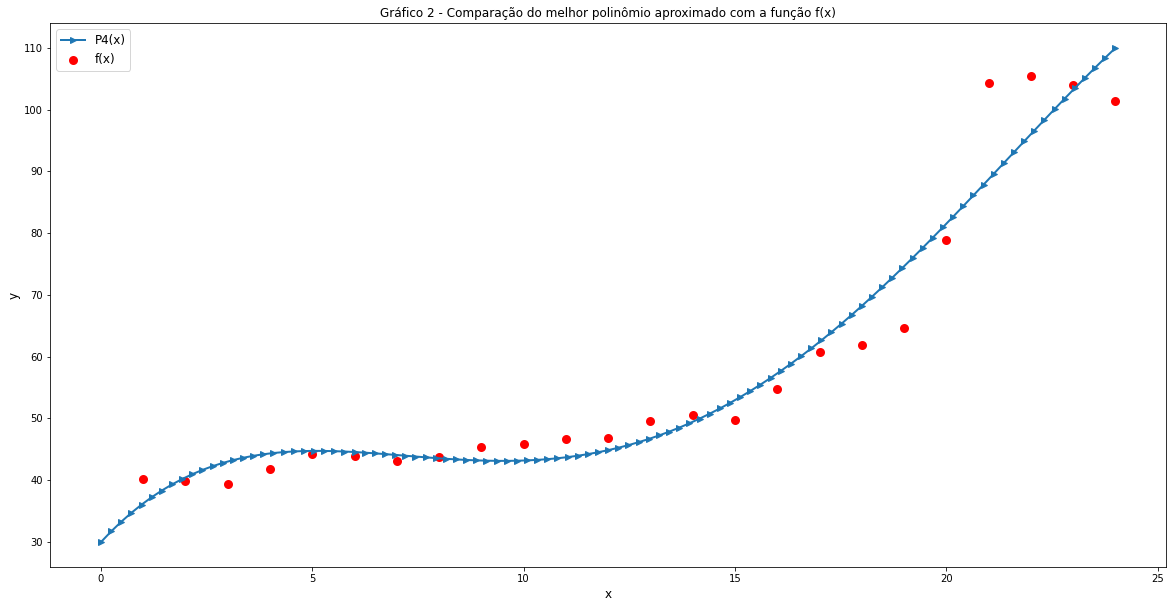

In [2]:
          ######################
          ## Entrada de dados ##
          ######################

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]; 
y = [40.17, 39.94, 39.31, 41.78, 44.22, 43.98, 43.08, 43.75, 45.40, 45.93, 46.60, 46.88, 49.60, 50.52, 49.81, 54.74, 60.72, 61.92, 64.67, 78.94, 104.39, 105.38, 103.98, 101.42]; ### Entrada com dados

#Converte-se as duas listas para a forma de vetores, de modo a operar seus elementos para o cálculo do erro de truncamento

xm = np.array([[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]);
ym = np.array([[40.17, 39.94, 39.31, 41.78, 44.22, 43.98, 43.08, 43.75, 45.40, 45.93, 46.60, 46.88, 49.60, 50.52, 49.81, 54.74, 60.72, 61.92, 64.67, 78.94, 104.39, 105.38, 103.98, 101.42]]); ### Entrada com dados

a4 = mmq(x,y,5)                                                                 #Usamos k = 5 pois queremos um polinômio de grau 4
p4 = lambda x: a4[4] + a4[3]*x + a4[2]*x**2 + a4[1]*x**3 + a4[0]*x**4;          #Definição do polinômio
print("Erro de truncamento de P4(x)")
errod(xm,ym,p4)
print('\n')
a3 = mmq(x,y,4)                                                                 #Usamos 4 pois queremos um polinômio de grau 3
p3 = lambda x: a3[3] + a3[2]*x + a3[1]*x**2 + a3[0]*x**3;                       #Definição do polinômio
print("Erro de truncamento de P3(x)")
errod(xm,ym,p3)
print('\n')
a2 = mmq(x,y,3)                                                                 #Usamos 3 pois queremos um polinômio de grau 2
p2 = lambda x: a2[2] + a2[1]*x + a2[0]*x**2;                                    #Definição do polinômio
print("Erro de truncamento de P2(x)")
errod(xm,ym,p2)
print('\n')
a1 = mmq(x,y,2)                                                                 #Usamos 2 pois queremos um polinômio de grau 1     
p1 = lambda x: a1[1] + a1[0]*x;                                                 #Definição do polinômio
print("Erro de truncamento de P1(x)")
errod(xm,ym,p1)

x_cont = np.linspace(0, 24, num=101, endpoint=True)

# Vamos plotar os resultados

plt.figure(figsize=(20,10),facecolor='white')
plt.scatter(x,y,label = 'f(x)',linewidth = 3,color='red')
plt.plot(x_cont,p4(x_cont),label = 'P4(x)',linewidth = 2,marker='>')
plt.plot(x_cont,p3(x_cont),label = 'P3(x)',linewidth = 2,marker='>')
plt.plot(x_cont,p2(x_cont),label = 'P2(x)',linewidth = 2,marker='>')
plt.plot(x_cont,p1(x_cont),label = 'P1(x)',linewidth = 2,marker='>')
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('Gráfico 1 - Comparação da função aproximada') 
plt.legend(fontsize='large') 
plt.show()

plt.figure(figsize=(20,10),facecolor='white')
plt.scatter(x,y,label = 'f(x)',linewidth = 3,color='red')
plt.plot(x_cont,p4(x_cont),label = 'P4(x)',linewidth = 2,marker='>')
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('Gráfico 2 - Comparação do melhor polinômio aproximado com a função f(x)') 
plt.legend(fontsize='large') 
plt.show()



Observa-se do resultado acima que o menor erro de truncamento é observado para o polinômio de grau 4 $P_{4}$. Além disso, observa-se que $P_{3}(x)$ apresenta um erro de truncamento próximo para com o erro de $P_{4}(x)$, que pode ser notado gráficamente. No gráfico 2, tem-se uma comparação de $P_{4}$ para com a distribuição de preços de arroz ao longo dos 24 meses. Assim concluí-se que $P_{4}(x)$ é o melhor aproximado.




# **Questão 2**

Observa-se que ambas funções a serem integradas possuem respostas analíticas, sendo expressas abaixo.

a)
\begin{equation}
\int_{0}^{1} \frac{4}{1 + x^{2}}dx = \pi
\end{equation}

b) 
\begin{equation}
\int_{-1}^{1} \cos(x)dx = 2\sin(1)
\end{equation}

Abaixo, realiza-se um resumo teórico dos métodos numéricos de integração abordados no curso.

Os três métodos discutidos são variações do Método de Newton-Cotes, ao qual utiliza de polinômios de interpolação para se obter aproximações da função original, sendo utilizados pontos (igualmente espaçados sobre o domínio) da própria função como nós de interpolação.

Imagina-se um intervalo real $[a=x_{0}, x_{n}=b]$ que contém $(n+1)$ pontos igualmente espaçados, sendo o passo (tamanho do subintervalo entre os pontos) dado por $h = (x_{n} - x_{0})/n$. O polinômio interpolador é obtido através do método de Lagrange, sendo descrito por $P_{n}(x)$.

Assim:

\begin{equation}
\int_{a}^{b}f(x)dx \approx \int_{x_{0}}^{x_{n}} P_{n}(x)dx
\end{equation}

Como visto no curso, tem-se que o polinômio interpolador de Lagrange é expresso por:

\begin{equation}
\sum_{k = 0}^{n}y_{k}l_{k}(x)
\end{equation}

Portanto:

\begin{equation}
\int_{x_{0}}^{x_{n}} P_{n}(x)dx = \sum_{k = 0}^{n} y_{k} \int_{x_{0}}^{x_{n}}l_{k}(x)dx
\end{equation}

De forma que $\int_{x_{0}}^{x_{n}}l_{k}(x)dx$ é tido como coeficiente de integração, que pode ser determinado por meio de uma mudança de variável.

Do intervalo definido, descreve-se a variável $x_{i}$, função do ponto inicial e do passo, onde:

\begin{equation}
x = x_{0} + th
\end{equation}

Sendo $t$ contido no conjunto dos números naturais. Através da expressão acima, pode-se alcançar qualquer ponto no intervalo discretizado, onde $x = x_{0} \rightarrow t = 0$ e, $x = x_{n} \rightarrow t = n$. Derivando a equação, tem-se:


\begin{equation}
\frac{d(x_{0} + th)}{dx} = \frac{hdt}{dx}
\end{equation}

Visto que $x_{0}$ é uma constante. Dessa forma, o polinômio de Lagrange pode ser escrito como:

\begin{equation}
\int_{x_{0}}^{x_{n}} l_{k}(x)dx = \int_{0}^{n} h \lambda_{k}(t) dt = h \int_{0}^{n} \lambda_{k}(t) dt
\end{equation}

De forma que $\lambda_{k}(x)$ trata-se do polinômio de Lagrange após a mudança de variável. Por conveniência, escreve-se a integral do polinômio de Lagrange  como um parâmetro $C_{k}^{n}$.

De forma a aplicar a mudança de variáveis sobre a expressão que se obtém o polinômio, tem-se:

\begin{equation}
l_{k}(x) = \prod_{i = 0, i \neq k}^{n} \frac{x - x_{i}}{x_{k} - x_{i}}
\end{equation}

Assim:

\begin{equation}
\lambda_{k}(t) = \prod_{i = 0, i \neq k}^{n} \frac{(x_{0} + th) - (x_{0} + ih)}{(x_{0} + kh) - (x_{0} + ih)} = \prod_{i = 0, i \neq k}^{n} \frac{h}{h} \frac{t - i}{k - i} = \prod_{i = 0, i \neq k}^{n} \frac{t - i}{k - i}
\end{equation}

De forma que o polinômio de interpolação, descrito por $C_{k}^{n}$ é definido por meio da integral definida de $0$ a $n$ do termo acima, ou seja:

\begin{equation}
\int_{a}^{b}f(x)dx \approx \sum_{k = 0}^{n} y_{k} h C_{k}^{n}
\end{equation}

Da expressão acima, tem-se o suficiente para obter os métodos deintegração numérica em pauta. De forma a definir o método do trapézio, emprega-se o polinômio interpolador como uma reta em um intervalo definido por dois pontos $[x_{0},x{1}]$ (tambem interpretado como um subintervalo de um intervalo maior), onde $n = 1$, de modo que $n$ indica o número de subintervalos que compõe o intervalo de integração. Portanto:

\begin{equation}
\int_{x0}^{x1} f(x)dx \approx \sum_{k = 0}^{1} y_{k}hC_{k}^{1} = y_{0}hC_{0}^{1} + y_{1}hC_{1}^{1}
\end{equation}

Assim, calculando-se os parâmetros $C_{0}^{1}$ e $C_{1}^{1}$:

\begin{equation}
C_{0}^{1} = \int_{0}^{1}\lambda_{0}(t)dt = \int_{0}^{1} \frac{t - 1}{0 - 1}dt = \frac{1}{2}
\end{equation}

e, também:

\begin{equation}
C_{1}^{1} = \int_{0}^{1}\lambda_{1}(t)dt = \int_{0}^{1} \frac{t - 0}{1 - 0}dt = \frac{1}{2}
\end{equation}

Assim, temos então:

\begin{equation}
\int_{x_{0}}^{x_{1}} \approx \frac{h}{2}(y_{0} + y_{1})
\end{equation}

Observa-se que a equação acima é área de um trapézio.

Generalizando o método do trapézio, obtém-se para $N$ subintervalos, ou seja, $(n+1)$ pontos:

\begin{equation}
\int_{x_{0} = a}^{x_{N} = b} = \frac{h}{2}(y_{0} + y_{N}) + h \sum_{k = 1}^{N-1} y_{k}
\end{equation}

Gráficamente, o método do trapézio em um subintervalo pode ser visualizado da seguinte forma.

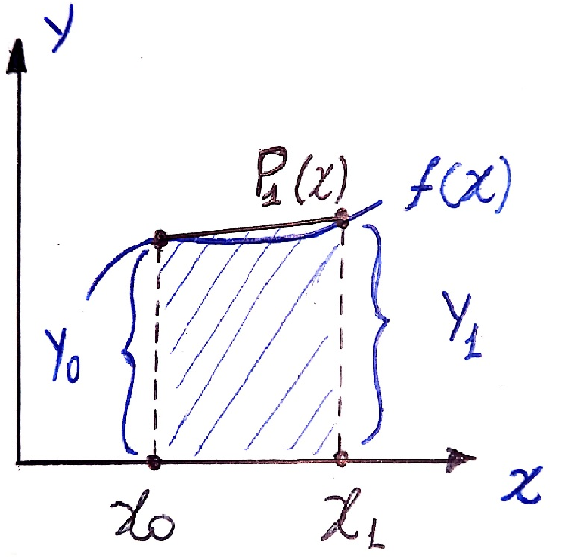

Sendo a aproximação da integral a área hachurada abaixo da reta $P_{1}(x)$ (interpolador).

Por sua vez, o método de 1/3 de Simpson emprega uma parábola para interpolar os subintervalos, de modo que contenham 3 pontos igualmente espassados. Os coeficientes de quadratura são obtidos da mesma forma como no método do trapézio, mas $n = 3$ de modo que $C_{k}^{n}$ são:

\begin{equation}
C_{0}^{2} = \int_{0}^{2}\lambda_{0}(t)dt = \int_{0}^{2} \frac{(t - 1)(t - 2)}{(0 - 1)(0-2)}dt = \frac{1}{3}
\end{equation}

\begin{equation}
C_{1}^{2} = \int_{0}^{2}\lambda_{1}(t)dt = \int_{0}^{2} \frac{(t - 0)(t - 2)}{(1 - 0)(1-2)}dt = \frac{4}{3}
\end{equation}

\begin{equation}
C_{2}^{2} = \int_{0}^{2}\lambda_{2}(t)dt = \int_{0}^{2} \frac{(t - 0)(t - 1)}{(2 - 0)(2-1)}dt = \frac{1}{3}
\end{equation}

Resultando para o subintervalo:

\begin{equation}
\int_{x_{0}}^{x_{2}} f(x)dx \approx \frac{h}{3}(y_{0} + 4y_{1} + y_{2})
\end{equation}

Por sua vez, tem-se como interpretação geometrica para o subintervalo em questão, sendo a área hachurada a qual quer se aproximar (função original):

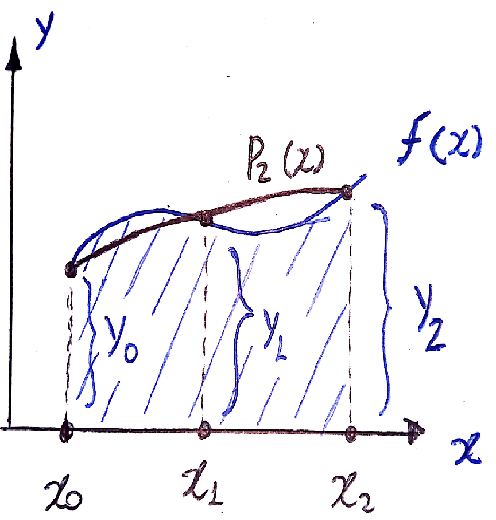

De forma que para sua generalzação, o intervalo deve conter $2N$ subintervalos e, consequentemente, $2N + 1$ pontos em seu interior, resultando em:

\begin{equation}
\int_{x_{0} = a}^{x_{2N} = b} f(x)dx \approx \frac{h}{3}[(y_{0} + 4y_{1} + 2y_{2} + 4y_{3} + ...+ 4y_{x_{2N - 1}} + y_{y_{2N}})]
\end{equation}

Por sua vez, o método de 3/8 de Simpson emprega um polinômio do terceiro grau para interpolar subintervalos que contém 4 pontos ($n=3$), de forma que, os coeficientes quadráticos ficam da seguinte forma:

\begin{equation}
C_{0}^{3} = \int_{0}^{3}\lambda_{0}(t)dt = \int_{0}^{3} \frac{(t - 1)(t - 2)(t - 3)}{(0 - 1)(0 - 2)(0 - 3)}dt = \frac{3}{8}
\end{equation}

\begin{equation}
C_{1}^{3} = \int_{0}^{3}\lambda_{1}(t)dt = \int_{0}^{3} \frac{(t - 0)(t - 2)(t-3)}{(1 - 0)(1-2)(1-3)}dt = \frac{9}{8}
\end{equation}

\begin{equation}
C_{2}^{3} = \int_{0}^{3}\lambda_{2}(t)dt = \int_{0}^{3} \frac{(t - 0)(t - 1)(t - 3)}{(2 - 0)(2-1)(2 - 3)}dt = \frac{9}{8}
\end{equation}

\begin{equation}
C_{3}^{3} = \int_{0}^{3}\lambda_{3}(t)dt = \int_{0}^{3} \frac{(t - 0)(t - 1)(t-2)}{(3 - 0)(3 - 1)(3-2)}dt = \frac{3}{8}
\end{equation}

De forma que para o subintervalo em questão, tem-se:

\begin{equation}
\int_{x_{0}}^{x_{3}} f(x) \approx \frac{3h}{8}(y_{0} + 3y_{1} + 3y_{2} + y_{3})
\end{equation}

Sendo sua interpretação geométrica exemplificada abaixo para um subintervalo, a area hachurada representa a área a qual quer se aproximar:

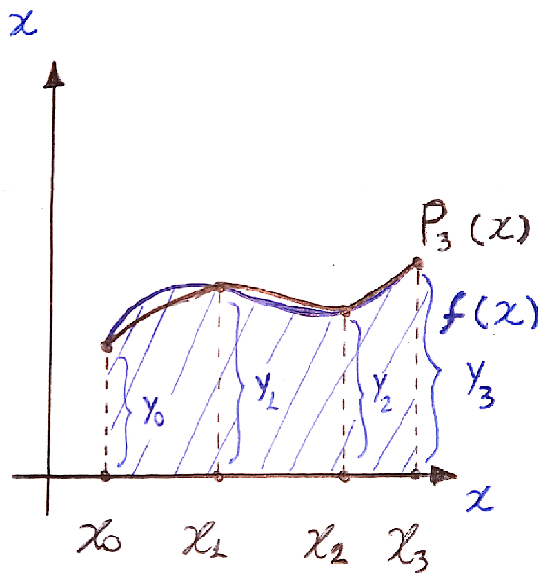

E em sua forma generalizada para todo o intervalo com $3N$ subintervalos e $3N + 3$ pontos, tem-se:

\begin{equation}
\int_{x_{0}}^{x_{3N}} f(x)dx \approx \frac{3h}{8}(y_{0} + 3y_{1} + 3y_{2} + y_{3} + ... y_{3N-3} + 3y_{3N - 2} + 3y_{3N-1} + y_{3N})
\end{equation}

Para a resolução de ambas integrais, há de ser utilizado a implementação dos métodos descritos acima, sendo os algoritmos correspondentes: $\textbf{III}$, $\textbf{IV}$ e $\textbf{V}$; sendo que os três possuem como entrada os pontos do domínio igualmente espaçados $x_{i}$ e a própria função $y_{i}$. Vale observar que apesar de $y_{i}$ ser o mesmo para os três algoritmos, $x_{i}$ é distinto, de modo que, para $N = 100$ (enunciado) o intervalo de integração deve apresentar $101$ pontos para o método do trapézio, $201$ para o método de 1/3 de Simpson e $301$ pontos para o método de 3/8 de Simpson.




In [3]:
N = 100;                                                                        #Número de pontos segundo o enunciado
xi1 = np.linspace(0,1,N+1,endpoint=True);                                       #Intervalo de integração de (a)
xi2 = np.linspace(-1,1,N+1,endpoint=True);                                      #Intervalo de integração de (b)

      ##########################################
# I)  ########### Regra do Trapezio ############
      ##########################################

yi1 = 4/(1 + (xi1)**2);                                                         #Função (a)
yi2 = np.cos(xi2);                                                              #Função (b)
int_trapz1 = trapezio(xi1,yi1);                                                 #Aplicação trapézio
int_trapz2 = trapezio(xi2,yi2);                                                 #Aplicação trapézio

       ##############################################
# II)  ############## Regra do 1/3 de Simpson #######
       ##############################################

N2 = 2*N;                                                                       #Número de pontos para integração
xi1 = np.linspace(0,1,N2+1,endpoint=True);                                       #Intervalo de integração de (a)
xi2 = np.linspace(-1,1,N2+1,endpoint=True);                                      #Intervalo de integração de (b)
yi1 = 4/(1 + (xi1)**2);
yi2 = np.cos(xi2);
int_simp131 = simpson13(xi1,yi1);                                               #Aplicação 1/3 Simpson
int_simp132 = simpson13(xi2,yi2);                                               #Aplicação 1/3 Simpson

        ##############################################
# III)  ############## Regra do 3/8 de Simpson #######
        ##############################################

N3 = 3*N;                                                                       #Número de pontos para integração
xi1 = np.linspace(0,1,N3+1,endpoint=True);                                       #Intervalo de integração de (a)
xi2 = np.linspace(-1,1,N3+1,endpoint=True);                                      #Intervalo de integração de (b)
yi1 = 4/(1 + (xi1)**2);
yi2 = np.cos(xi2);
int_simp381 = simpson38(xi1,yi1);                                               #Aplicação 3/8 Simpson
int_simp382 = simpson38(xi2,yi2);                                               #Aplicação 3/8 Simpson

#Comparação dos resultados com a solução exata

des_int_trapz1 = abs(int_trapz1 - m.pi)
des_int_trapz2 = abs(int_trapz2 - 2*m.sin(1))
des_int_simp131 = abs(int_simp131 - m.pi)
des_int_simp132 = abs(int_simp132 - 2*m.sin(1))
des_int_simp381 = abs(int_simp381 - m.pi)
des_int_simp382 = abs(int_simp382 - 2*m.sin(1))

#Apresentação das respostas

print('Pelo método do trapézio, tem-se os resultados')
print('\n')
print('Integral (a) exata: %.8f'%(m.pi))
print('Integral (a) com regra do trapézio: %.8f'%(int_trapz1))
print('Sendo seu desvio absoluto (erro): %.8f'%(des_int_trapz1))
print('\n')
print('Integral (b) exata: %.8f'%(2*m.sin(1)))
print('Integral (b) com regra do trapézio: %.8f'%(int_trapz2))
print('Sendo seu desvio absoluto (erro): %.8f'%(des_int_trapz2))
print('\n')
print('Pelo método de 1/3 de Simpson, tem-se os resultados')
print('\n')
print('Integral (a) exata: %.15f'%(m.pi))
print('Integral (a) com regra de 1/3 de Simpson: %.15f'%(int_simp131))
print('Sendo seu desvio absoluto (erro): %.15f'%(des_int_simp131))
print('\n')
print('Integral (b) exata: %.15f'%(2*m.sin(1)))
print('Integral (b) com regra de 1/3 de Simpson: %.15f'%(int_simp132))
print('Sendo seu desvio absoluto (erro): %.15f'%(des_int_simp132))
print('\n')
print('Pelo método de 3/8 de Simpson, tem-se os resultados')
print('\n')
print('Integral (a) exata: %.15f'%(m.pi))
print('Integral (a) com regra de 3/8 de Simpson: %.15f'%(int_simp381))
print('Sendo seu desvio absoluto (erro): %.15f'%(des_int_simp381))
print('\n')
print('Integral (b) exata: %.15f'%(2*m.sin(1)))
print('Integral (b) com regra de 3/8 de Simpson: %.15f'%(int_simp382))
print('Sendo seu desvio absoluto (erro): %.15f'%(des_int_simp382))

Pelo método do trapézio, tem-se os resultados


Integral (a) exata: 3.14159265
Integral (a) com regra do trapézio: 3.14157599
Sendo seu desvio absoluto (erro): 0.00001667


Integral (b) exata: 1.68294197
Integral (b) com regra do trapézio: 1.68288587
Sendo seu desvio absoluto (erro): 0.00005610


Pelo método de 1/3 de Simpson, tem-se os resultados


Integral (a) exata: 3.141592653589793
Integral (a) com regra de 1/3 de Simpson: 3.141592653589793
Sendo seu desvio absoluto (erro): 0.000000000000000


Integral (b) exata: 1.682941969615793
Integral (b) com regra de 1/3 de Simpson: 1.682941969709292
Sendo seu desvio absoluto (erro): 0.000000000093499


Pelo método de 3/8 de Simpson, tem-se os resultados


Integral (a) exata: 3.141592653589793
Integral (a) com regra de 3/8 de Simpson: 3.141592653589793
Sendo seu desvio absoluto (erro): 0.000000000000000


Integral (b) exata: 1.682941969615793
Integral (b) com regra de 3/8 de Simpson: 1.682941969657358
Sendo seu desvio absoluto (erro): 0.0000

Pelos resultados acima, pode-se notar que os métodos de Simpson apresentam-se mais precisos em relação a integral exata (analítica) do que o método do trapézio. E entre os métodos de Simpson, o resultado da integra (b) mostra-se mais preciso quando executado pelo método de 3/8 de Simpson, de modo que apresenta desvio absoluto de $4.1565 \times 10^{-11}$ e, por sua vez, usando o método de 1/3 de Simpson, há o desvio de $9.3499 \times 10^{-11}$.

# **Questão 3**

Apartir do algoritmo de resolução de sistemas de EDOs $\textbf{VI}$, o mesmo é aplicado para o modelo de Kermack-McKendrick com os parâmetros descritos pelo enunciado. Tendo $F$ como a matriz do sistema.

a)


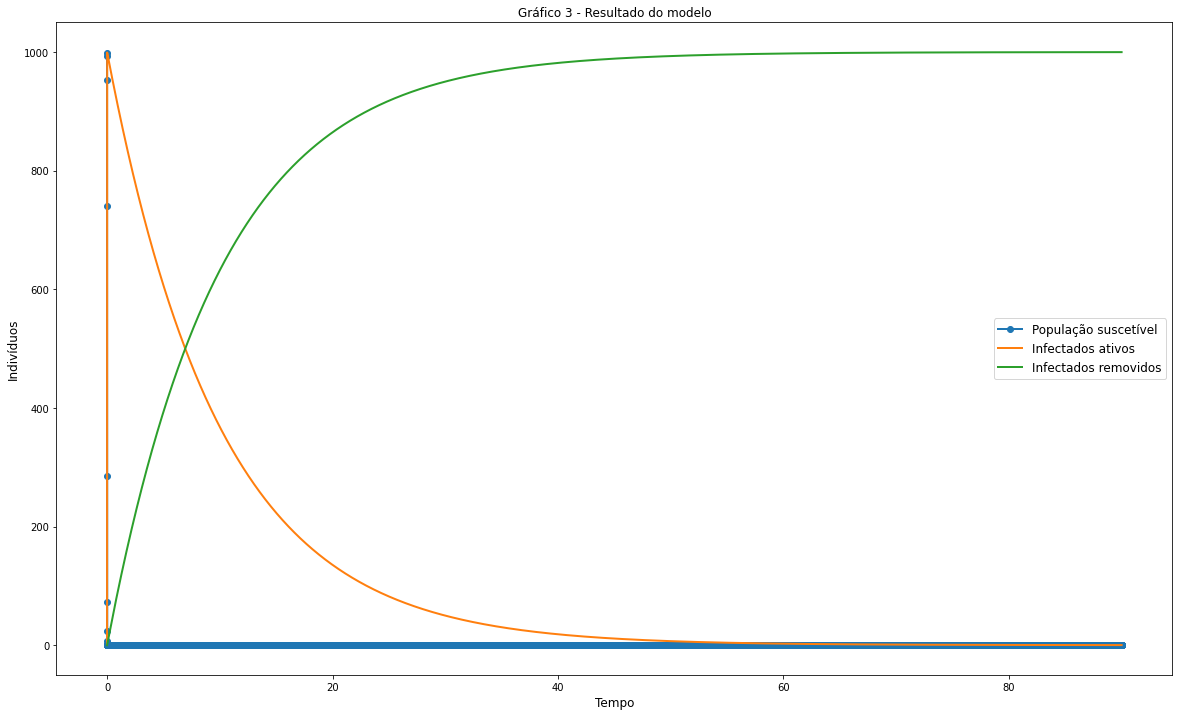

In [4]:
# Y = [y1,y2,y3] e F = [-cy1y2, cy1y2 - dy2, dy2]; c = 1 e d = 90               
# c --> taxa de contágio; d --> taxa de remoção de infectados (morte, imunidade ou cura)

t = 90                                                                          #Período de simulação

c = 2;  d = 0.1;                                                                #Parâmetros do enunciado
F = lambda x,Y: np.array([-c*Y[0]*Y[1], c*Y[0]*Y[1] - d*Y[1], d*Y[1]]);         #Matriz do sistema

Y0 = np.array([999,1,0]);                                                       #Condições iniciais
h = 0.001;                                                                      #Passo 
n = int((t - 0)/h);                                                             #Número de pontos na reta real
x = np.linspace(0,t,n+1, endpoint = True);                                      #Pontos na reta real

Y_rk4a = rk4_sys(x,h,F,Y0);                                                     #Aplicação do Método de Runge-Kutta

#Vamos plotar os resultados
plt.figure(figsize=(20,12),facecolor='white')
plt.plot(x,Y_rk4a[0,:],label = 'População suscetível',linewidth = 2, marker = 'o')
plt.plot(x,Y_rk4a[1,:],label = 'Infectados ativos',linewidth = 2)              
plt.plot(x,Y_rk4a[2,:],label = 'Infectados removidos',linewidth = 2)            
plt.xlabel('Tempo',fontsize='large') 
plt.ylabel('Indivíduos',fontsize='large') 
plt.title('Gráfico 3 - Resultado do modelo') 
plt.legend(fontsize='large') 
plt.show()

Pelo resultado acima, observa-se que a população é contaminada muito rapidamente, de forma que, pouco tempo após $t=0$, a maior parte da populção e, se não, toda ela, entra em contato com o agente da patologia, contaminando-se. Para observar melhor o processo de contaminação, emprega-se um intervalo de tempo mais curto, permitindo que se visualize 4 iterações do método de Runge-Kutta de 4° ordem.

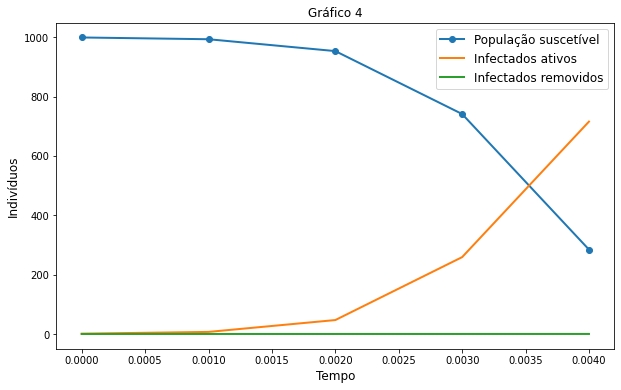

In [5]:
# Y = [y1,y2,y3] e F = [-cy1y2, cy1y2 - dy2, dy2]; c = 1 e d = 5
# c --> taxa de contágio; d --> taxa de remoção de infectados (morte, imunidade ou cura)

t1 = 0.004                                                                      #Período de simulação
h = 0.001;                                                                      #Passo
n1 = int((t1 - 0)/h);                                                           #Número de pontos na reta real
x1 = np.linspace(0,t1,n1+1, endpoint = True);                                   #Pontos da reta real

Y_rk41 = rk4_sys(x1,h,F,Y0);                                                    #Aplicação de Runge-Kutta de 4° ordem

#Vamos plotar os resultados

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x1,Y_rk41[0,:],label = 'População suscetível',linewidth = 2, marker = 'o')  
plt.plot(x1,Y_rk41[1,:],label = 'Infectados ativos',linewidth = 2)              
plt.plot(x1,Y_rk41[2,:],label = 'Infectados removidos',linewidth = 2)           
plt.xlabel('Tempo',fontsize='large') 
plt.ylabel('Indivíduos',fontsize='large') 
plt.title('Gráfico 4') 
plt.legend(fontsize='large') 
plt.show()

Nota-se que para $0.0035 < t < 0.004$ as curva de infectados e da população suscetível se cruzam e, assim, há mais indivíduos contaminadas do que aqueles que ainda podem vir a ser contaminados. O resultado é muito interessante e denota a importância de medidas rápidas para a contenção da epidemia quando ainda há poucos casos identificados na população. Além de seu rápido crescimento, observa-se a natureza assintótica dos curvas, onde a curva de infectados após crescer muito e contaminar a maior parte da população, tende a zero depois de $t > 50$. Por sua vez, a curva de removidos tende a população total, mas cresce mais lentamente que a curva de infectados. Esse resultado faz sentido, pois após grande disseminação (grande crescimento da curva de ativos) do patógeno, acaba sendo cada vez mais difícil que indivíduos já contaminados e potenciais vetores, tenham contato com indivíduos suscetíveis a contaminação, uma vez que se tornam cada vez mais raros na população. Desse modo, a curva de infectados decresce assintoticamente para zero a medida que o tempo avança e infectados ativos passa a se tornar infectados removidos. Por sua vez, a curva de removidos cresce a medida que a de infectados ativos decresce, o que faz sentido, pois a medida que o tempo avança, os indivíduos ativos infectados acabam sendo removidos, seja por medidas coletivas de contenção da epidemia, por seu óbito ou alcance individual de imunidade.

b)  Com medidas de isolamento ($d = 0.5$), aplica-se o algoritmo para a obter a solução do sistema de EDOs.

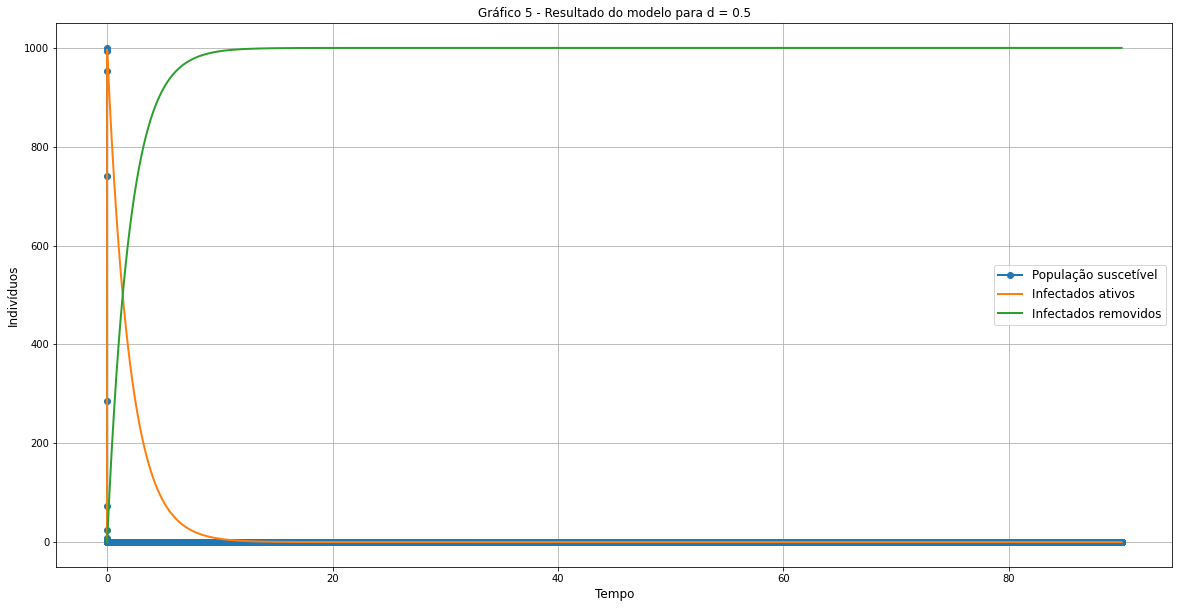

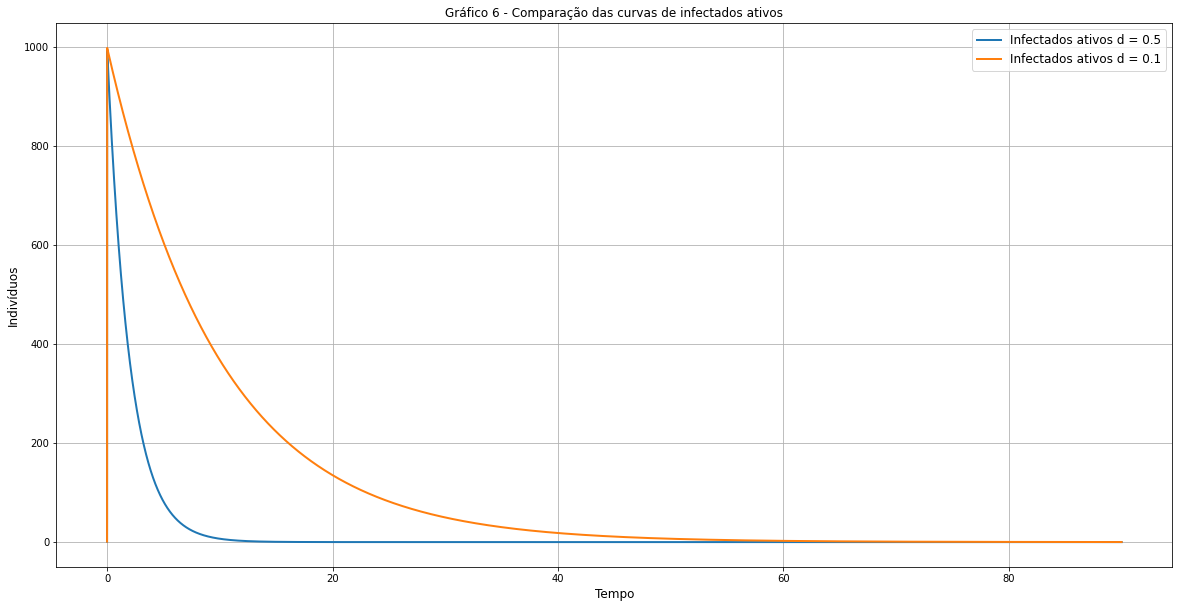

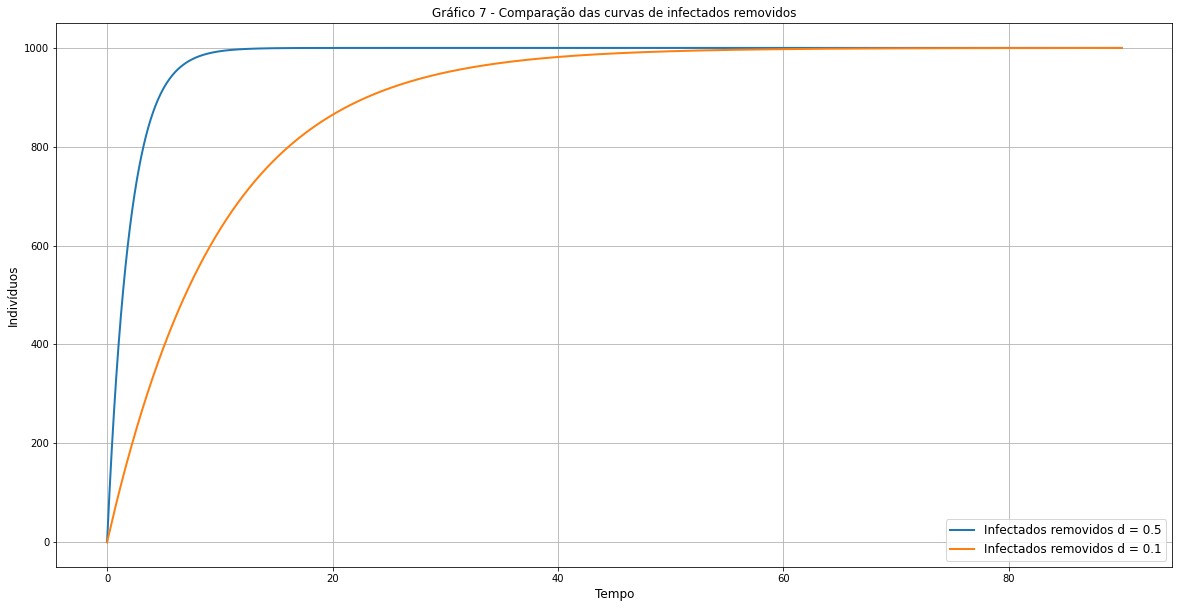

In [7]:
t = 90
d = 0.5;
x = np.linspace(0,t,n+1, endpoint = True);

Y_rk4b = rk4_sys(x,h,F,Y0);

#Vamos plotar os resultados

plt.figure(figsize=(20,10),facecolor='white')
plt.grid(True)
plt.plot(x,Y_rk4b[0,:],label = 'População suscetível',linewidth = 2, marker = 'o')
plt.plot(x,Y_rk4b[1,:],label = 'Infectados ativos',linewidth = 2)               
plt.plot(x,Y_rk4b[2,:],label = 'Infectados removidos',linewidth = 2)            
plt.xlabel('Tempo',fontsize='large') 
plt.ylabel('Indivíduos',fontsize='large') 
plt.title('Gráfico 5 - Resultado do modelo para d = 0.5')
plt.legend(fontsize='large') 
plt.show()

plt.figure(figsize=(20,10),facecolor='white')
plt.grid(True)
plt.plot(x,Y_rk4b[1,:],label = 'Infectados ativos d = 0.5',linewidth = 2)        
plt.plot(x,Y_rk4a[1,:],label = 'Infectados ativos d = 0.1',linewidth = 2)       
plt.xlabel('Tempo',fontsize='large') 
plt.ylabel('Indivíduos',fontsize='large') 
plt.title('Gráfico 6 - Comparação das curvas de infectados ativos') 
plt.legend(fontsize='large') 
plt.show()

plt.figure(figsize=(20,10),facecolor='white')
plt.grid(True)
plt.plot(x,Y_rk4b[2,:],label = 'Infectados removidos d = 0.5',linewidth = 2)     
plt.plot(x,Y_rk4a[2,:],label = 'Infectados removidos d = 0.1',linewidth = 2)    
plt.xlabel('Tempo',fontsize='large') 
plt.ylabel('Indivíduos',fontsize='large') 
plt.title('Gráfico 7 - Comparação das curvas de infectados removidos') 
plt.legend(fontsize='large') 
plt.show()

A partir do gráfico 5, é possível constatar que medidas mais expressivas de isolamento não foram suficientes para conter a propagação da epidemia na população, uma vez que a curva de infectados ativos ainda atinge seu máximo próximo de 1000 indivíduos. No entanto, observa-se que a mesma descresce mais rapidamente do que a mesma curva para $d = 0.1$ e, consequentemente, a curva de infectados removidos cresce mais rapidamente. Vale lembrar que a última contabiliza óbitos, imunizações e isolamento; sendo que as novas medidas promovem apenas o isolamento apartir do gráfico 7, é possível comparar o resultado das novas medidas restritivas sobre o modelo, levando a uma população de indivíduos removidos de maior número mais rapidamente. Com as novas medidas, o número de indivíduos contaminados simultaneamente é menor ao longo do tempo, de modo que a curva de infectados ativos tende a zero antes mesmo de $t > 20$, o gráfico 6 compara o número de infectados ativos para os dois cenários, de forma que, a curva do modelo com medidas de isolamento mais fortes decresce mais rapidamente.. Desse modo, a medida de isolamento mostra-se efetiva para reduzir os impactos da patologia sobre a saúde da população, tendo-se como resultado um período mais curto para que não haja mais infectados ativos.